# Validacion climMAPcore (Sonora)
En el siguiente ejercicio vamos a generar ciertos indicadores estadisticos para la validacion de las salidas de informacion de la aplicacion climMAPcore
### Procedimiento
Los valores a comparar son el valor diario de la estacion vs el valor de la aplicacion climMAPcore. La base que se utilizara se encuentra en la carpeta **data** de nombre **dataFromSonoraClimmapcore.csv** la cual incluye los siguientes campos:
* Station : numero de la estacion
* State : estado
* Lat : latitud
* Long : longitud
* Year : anio
* Month : mes
* Day : dia
* Rain : precipitacion estacion
* Hr :  humedad relativa estacion
* Tpro :  temperatura promedio estacion
* RainWRF :  precipitacion modelo WRF
* HrWRF :  humedad relativa modelo WRF
* TproWRF :  tmperatura promedio modelo WRF

In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
%matplotlib inline
plt.style.use('grayscale')

In [2]:
# leer archivo
data = pd.read_csv('../data/dataFromSonoraClimmapcore.csv')

In [3]:
# verificar su contenido
data.head()

,Station,State,Lat,Long,Year,Month,Day,Rain,Hr,Tpro,RainClimmapcore,HrClimmapcore,TproClimmapcore
0,202.0,SON,31.24285,31.24285,2017.0,1.0,1.0,2.2,81.68,7.83,4.395632,83.594606,5.334911
1,202.0,SON,31.24285,31.24285,2017.0,1.0,2.0,0.0,79.31,5.44,0.000000,65.869472,5.176305
2,202.0,SON,31.24285,31.24285,2017.0,1.0,3.0,0.0,77.97,8.03,0.000000,54.481063,7.272054
3,202.0,SON,31.24285,31.24285,2017.0,1.0,4.0,0.0,63.50,11.99,0.000000,44.442115,10.109478
4,202.0,SON,31.24285,31.24285,2017.0,1.0,5.0,0.0,65.01,10.41,0.000000,60.398223,10.115241


In [4]:
# diferencia entre valores de precipitacion, humedad relativa y temperatura promedio
data['diffRain'] = data['Rain'] - data['RainClimmapcore']
data['diffHr'] = data['Hr'] - data['HrClimmapcore']
data['diffTpro'] = data['Tpro'] - data['TproClimmapcore']

In [5]:
# verificar contenido
data.head()

,Station,State,Lat,Long,Year,Month,Day,Rain,Hr,Tpro,RainClimmapcore,HrClimmapcore,TproClimmapcore,diffRain,diffHr,diffTpro
0,202.0,SON,31.24285,31.24285,2017.0,1.0,1.0,2.2,81.68,7.83,4.395632,83.594606,5.334911,-2.195632,-1.914606,2.495089
1,202.0,SON,31.24285,31.24285,2017.0,1.0,2.0,0.0,79.31,5.44,0.000000,65.869472,5.176305,0.000000,13.440528,0.263695
2,202.0,SON,31.24285,31.24285,2017.0,1.0,3.0,0.0,77.97,8.03,0.000000,54.481063,7.272054,0.000000,23.488937,0.757946
3,202.0,SON,31.24285,31.24285,2017.0,1.0,4.0,0.0,63.50,11.99,0.000000,44.442115,10.109478,0.000000,19.057885,1.880522
4,202.0,SON,31.24285,31.24285,2017.0,1.0,5.0,0.0,65.01,10.41,0.000000,60.398223,10.115241,0.000000,4.611777,0.294759


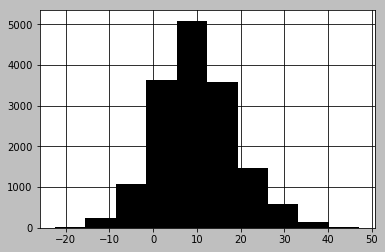

In [6]:
# histograma de diferencias Hr
data['diffHr'].hist()

In [7]:
# comportamiento de los datos por mes
data.groupby(['Month']).mean()[['Hr','HrClimmapcore']]

,Hr,HrClimmapcore
Month,,
1.0,65.052512,51.690188
2.0,60.904679,48.403586
3.0,47.006448,36.338103
4.0,38.677613,30.659718
5.0,41.213288,34.168186
6.0,44.793388,36.887565


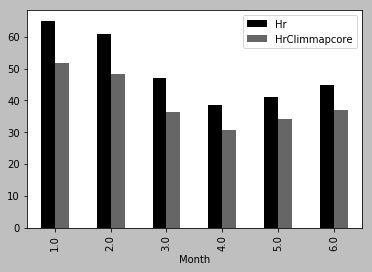

In [8]:
# visualizar los datos en grafica
data.groupby(['Month']).mean()[['Hr','HrClimmapcore']].plot.bar()

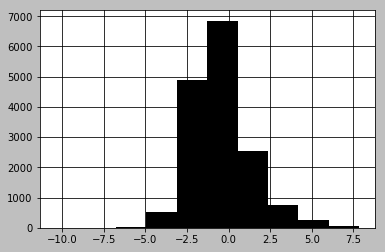

In [9]:
# histograma de diferencias Tpro
data['diffTpro'].hist()

In [10]:
# comportamiento de los datos por mes
data.groupby(['Month']).mean()[['Tpro','TproClimmapcore']]

,Tpro,TproClimmapcore
Month,,
1.0,13.518076,14.327075
2.0,16.391271,16.996687
3.0,19.960081,20.654582
4.0,21.977135,22.426174
5.0,23.942163,24.042585
6.0,29.235677,29.546245


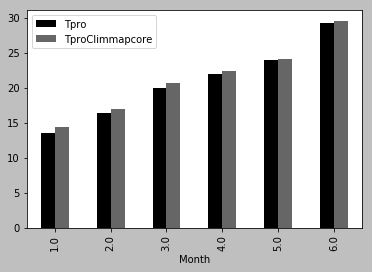

In [11]:
# visualizar los datos en grafica
data.groupby(['Month']).mean()[['Tpro','TproClimmapcore']].plot.bar()

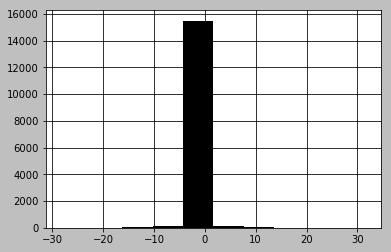

In [12]:
# histograma de diferencias Rain
data['diffRain'].hist()

In [13]:
# comportamiento de los datos por mes
data.groupby(['Month']).mean()[['Rain','RainClimmapcore']]

,Rain,RainClimmapcore
Month,,
1.0,0.556528,0.859610
2.0,0.656296,1.126113
3.0,0.050972,0.020695
4.0,0.022925,0.016521
5.0,0.058174,0.017068
6.0,0.184853,0.119821


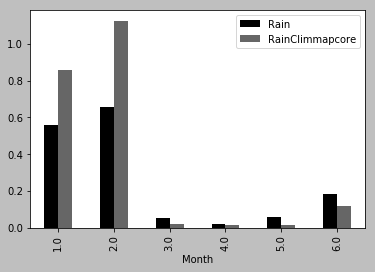

In [14]:
# visualizar los datos en grafica
data.groupby(['Month']).mean()[['Rain','RainClimmapcore']].plot.bar()

## Regresion Lineal

In [15]:
# librerias seabron as sns
import seaborn as sns

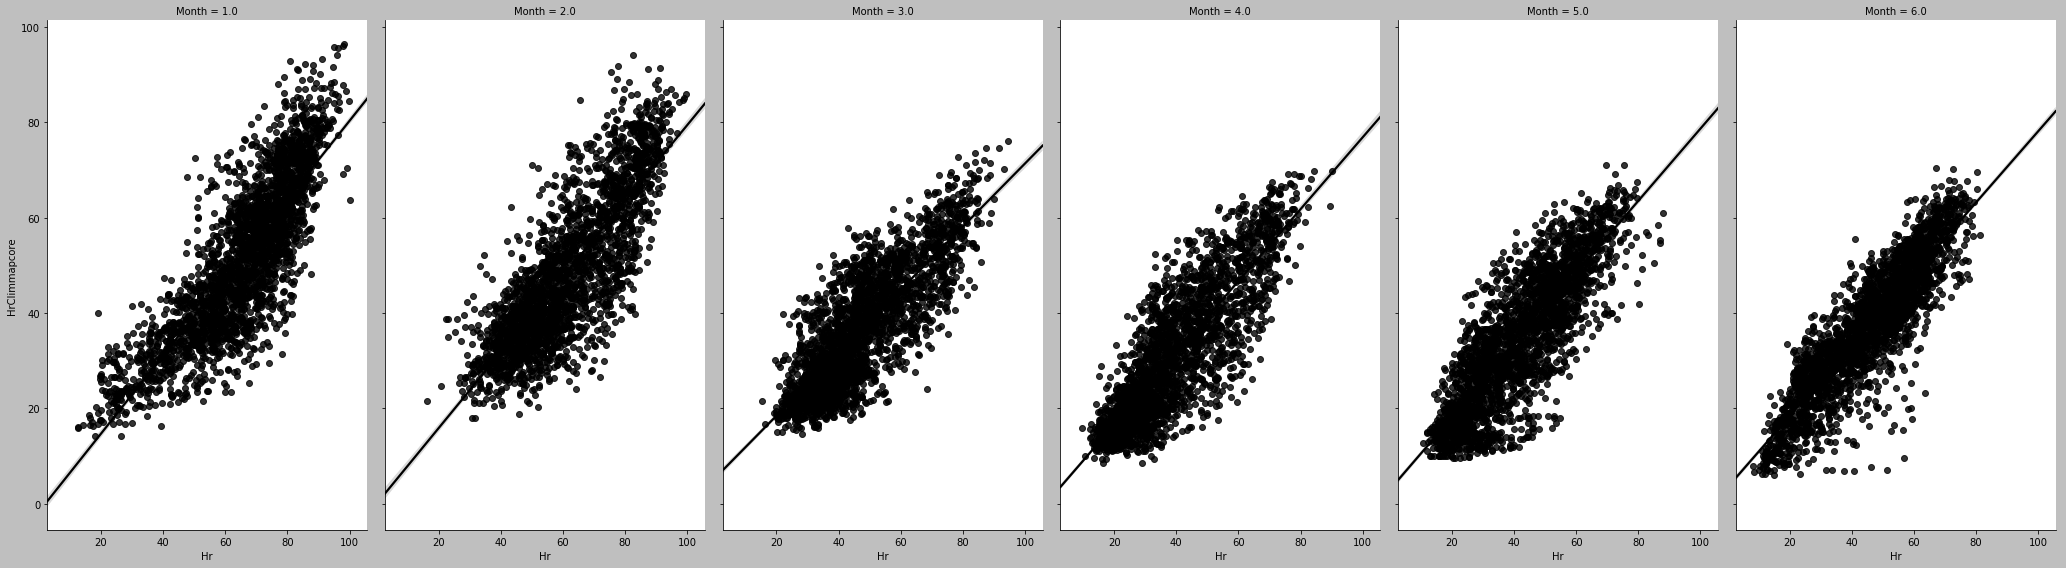

In [16]:
# Hr
sns.lmplot(x='Hr',y='HrClimmapcore',data=data, col='Month', aspect=0.6, size=8)

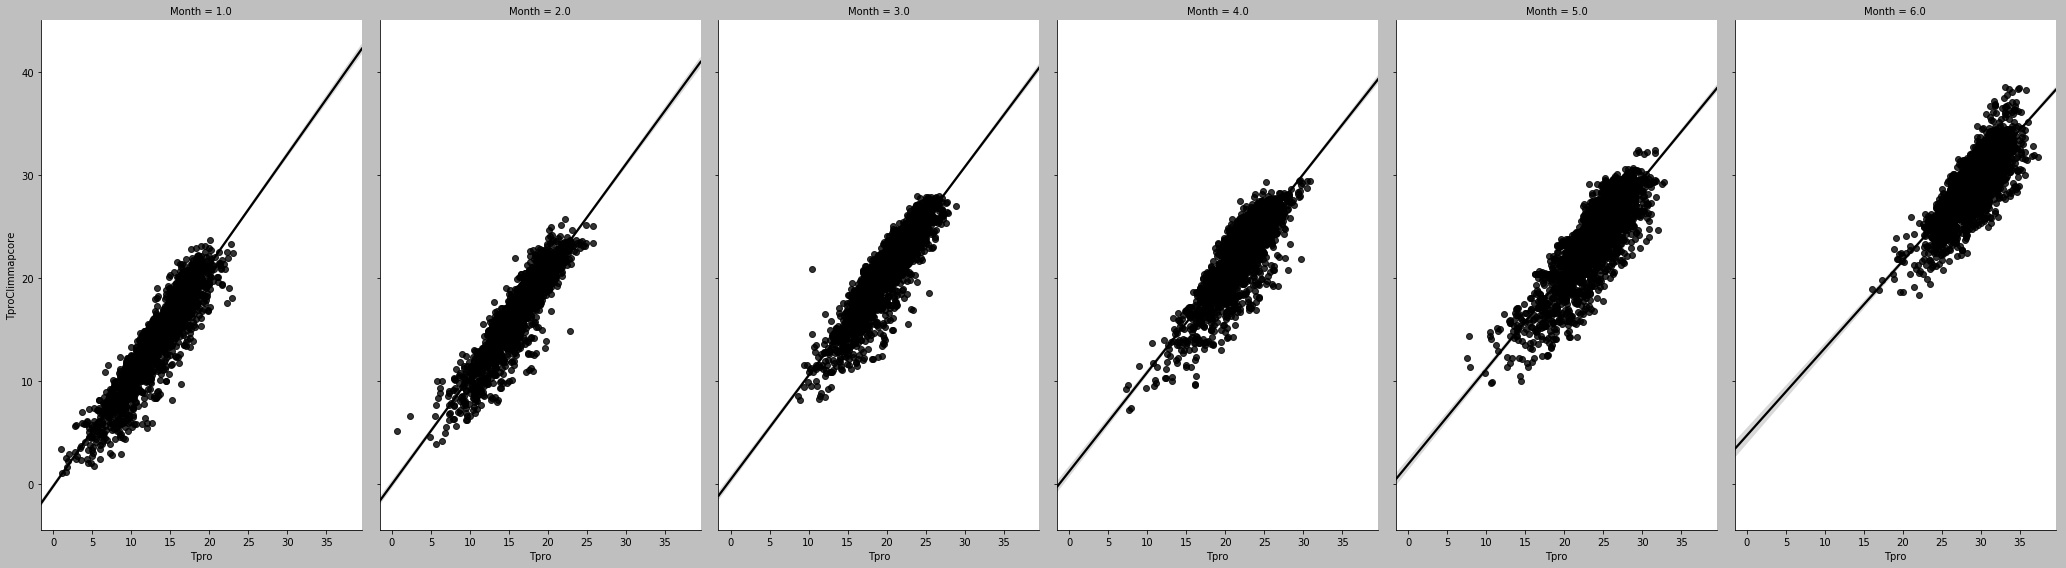

In [17]:
# Tpro
sns.lmplot(x='Tpro',y='TproClimmapcore',data=data, col='Month', aspect=0.6, size=8)

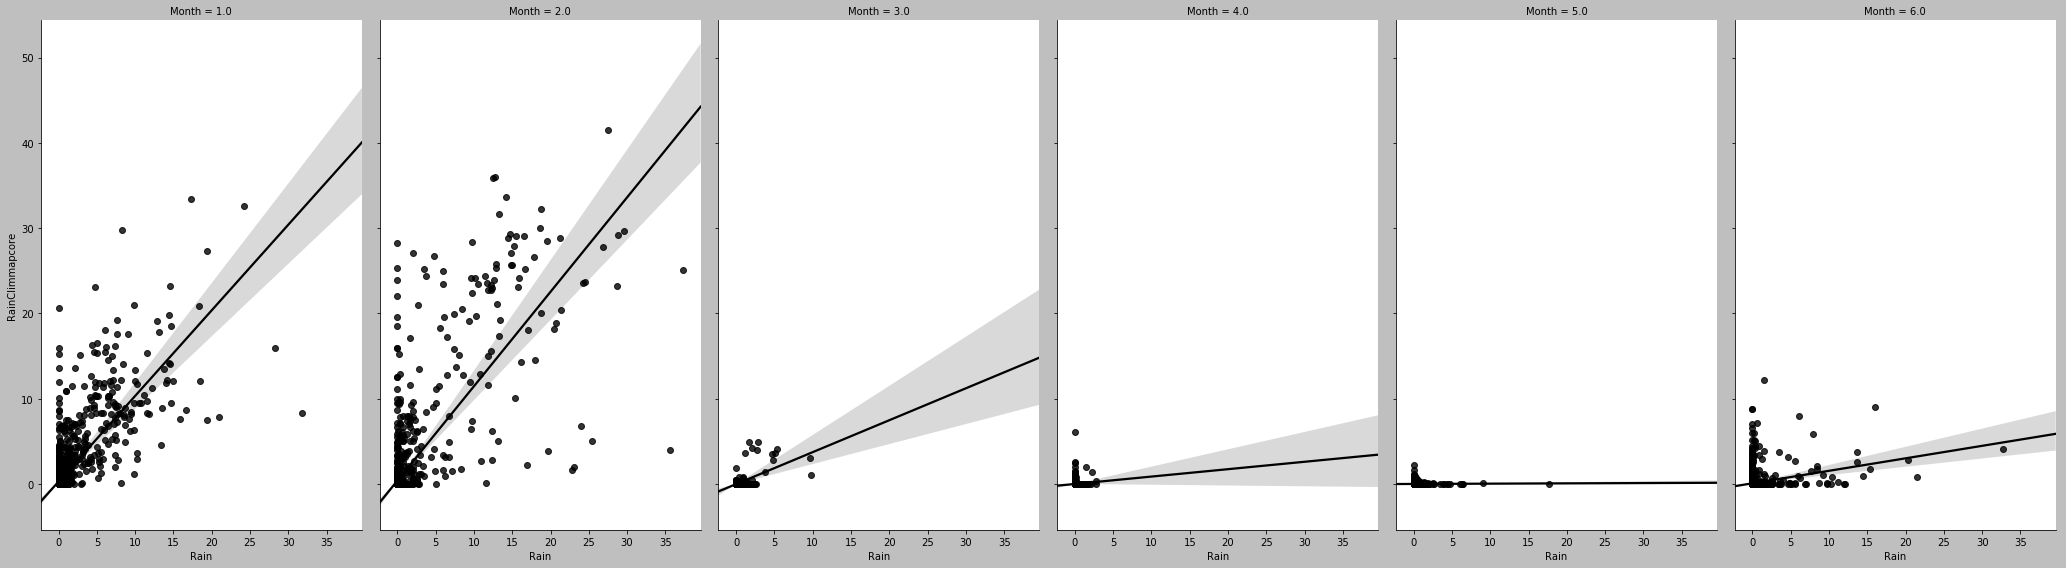

In [18]:
# Rain
sns.lmplot(x='Rain',y='RainClimmapcore',data=data, col='Month', aspect=0.6, size=8)

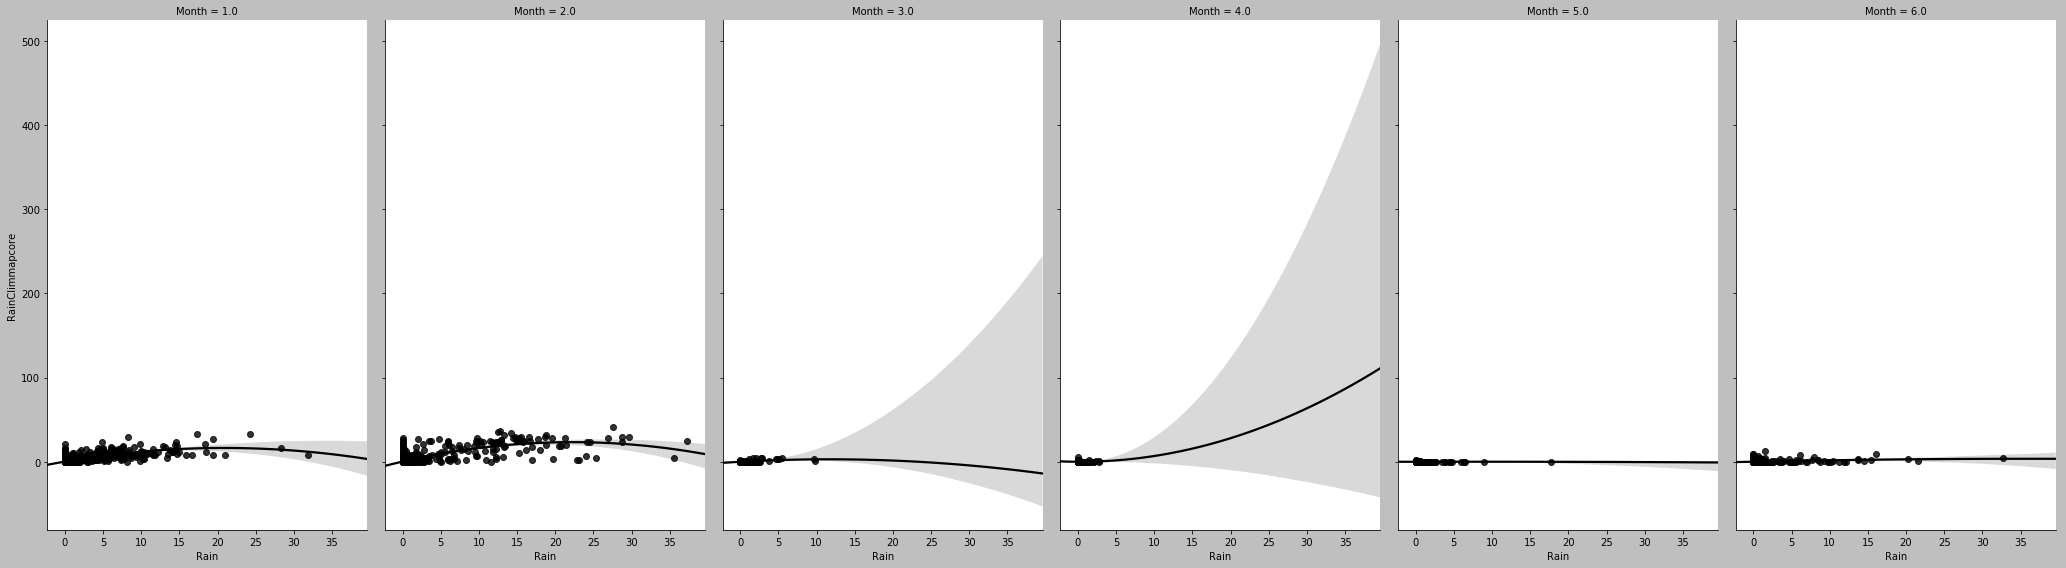

In [19]:
# Rain polynomial regression
sns.lmplot(x='Rain',y='RainClimmapcore',data=data, col='Month', aspect=0.6, size=8, order=2)

## Regresion lineal con p y pearsonr

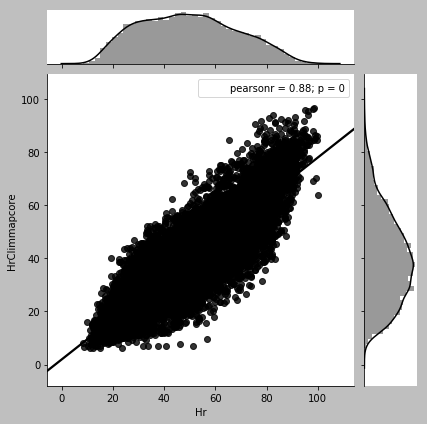

In [20]:
# Hr
sns.jointplot("Hr", "HrClimmapcore", data=data, kind="reg")

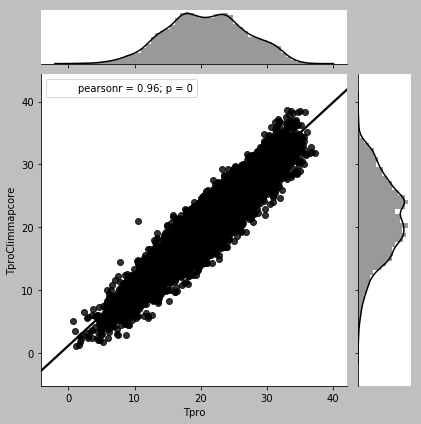

In [21]:
# Tpro
sns.jointplot("Tpro", "TproClimmapcore", data=data, kind="reg")

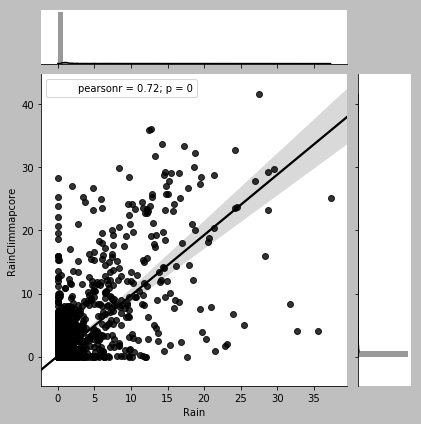

In [22]:
# Rain
sns.jointplot("Rain", "RainClimmapcore", data=data, kind="reg",color="k")

## OLS Regression

In [23]:
# HR
result = sm.ols(formula='HrClimmapcore ~ Hr', data=data).fit()

In [24]:
print(result.params)

Intercept    1.969584
Hr           0.760320
dtype: float64


In [25]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          HrClimmapcore   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 5.224e+04
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:43:55   Log-Likelihood:                -55265.
No. Observations:               15894   AIC:                         1.105e+05
Df Residuals:                   15892   BIC:                         1.105e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9696      0.176     11.190      0.0

In [26]:
# Tpro
result = sm.ols(formula='TproClimmapcore ~ Tpro', data=data).fit()

In [27]:
print(result.params)

Intercept    1.178283
Tpro         0.967198
dtype: float64


In [28]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        TproClimmapcore   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.763e+05
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:44:02   Log-Likelihood:                -31323.
No. Observations:               15894   AIC:                         6.265e+04
Df Residuals:                   15892   BIC:                         6.267e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1783      0.050     23.581      0.0

In [29]:
# Rain
result = sm.ols(formula='RainClimmapcore ~ Rain', data=data).fit()

In [30]:
print(result.params)

Intercept    0.111405
Rain         0.956721
dtype: float64


In [31]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        RainClimmapcore   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                 1.723e+04
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:44:07   Log-Likelihood:                -29325.
No. Observations:               15894   AIC:                         5.865e+04
Df Residuals:                   15892   BIC:                         5.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1114      0.012      9.070      0.0

## Histogramas seaborn

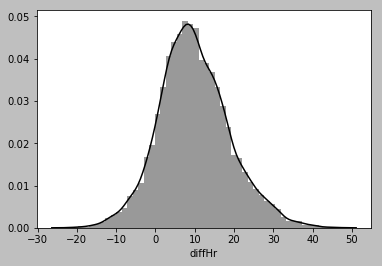

In [32]:
# Hr
sns.distplot(data['diffHr'],color="k")

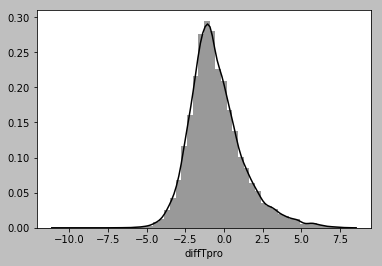

In [33]:
# Tpro
sns.distplot(data['diffTpro'], color="k")

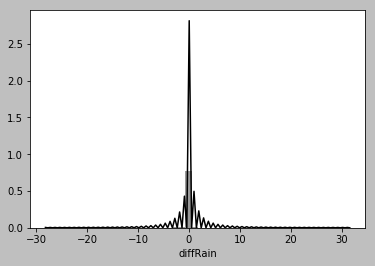

In [34]:
# Rain
sns.distplot(data['diffRain'], color="k")